In [1]:
%load_ext autoreload
%autoreload 2

In [66]:
import numpy as np
import pandas as pd
import pickle

from src.sqr.sqr import calculate_sqi

# DESARROLLO

In [6]:
sessions = pd.read_parquet('../data/raw/flex_desarrollo_sesiones.parquet')

In [7]:
sessions.head()

,idSesiones,fechaInicio,fechaFin,idPerfil,idImatt,sqr,lecho,notaUsuario,suenios,idUsuario,...,poco_descanso,notas,imagen_hot,wake,rem,nr_1,nr_2,deep,fechaEntrada,idPerfilPadre
0,20,2017-06-29 01:18:47,2017-06-29 07:51:47,NaN,11.0,40.0493,1.0,NaN,None,3.0,...,NaN,0,None,None,None,None,None,None,NaT,0
1,21,2017-06-30 01:29:11,2017-06-30 07:53:34,NaN,11.0,27.3639,1.0,NaN,None,3.0,...,NaN,0,None,None,None,None,None,None,NaT,0
2,22,2017-07-01 01:02:20,2017-07-01 06:15:55,NaN,11.0,40.3763,1.0,NaN,None,3.0,...,NaN,0,None,None,None,None,None,None,NaT,0
3,23,2017-07-01 00:32:46,2017-07-01 08:18:00,NaN,37.0,27.2268,1.0,2.0,None,2.0,...,0.0,0,None,None,None,None,None,None,NaT,0
4,24,2017-07-01 00:32:51,2017-07-01 06:50:36,NaN,37.0,21.9241,2.0,NaN,None,2.0,...,NaN,0,None,None,None,None,None,None,NaT,0


In [10]:
sessions = pd.read_parquet('../data/raw/flex_desarrollo_sesiones.parquet')
movements = pd.read_parquet('../data/raw/flex_desarrollo_movimientos.parquet')

In [45]:
def rename_movement_columns(df):
    old_names = ['fecha', 'presion0', 'presion1', 'presion2', 'presion3', 
                 'presion4', 'presion5', 'presion6', 'presion7', 'presion8',
                 'presion9', 'presion10', 'presion11', 'presion12',
                 'tipoMovimiento']
    new_names = ['timestamp', 'pressure0', 'pressure1', 'pressure2', 
             'pressure3', 'pressure4', 'pressure5', 'pressure6', 
             'pressure7', 'pressure8','pressure9', 'pressure10',
             'pressure11', 'pressure12', 'type']
    
    return df.rename(columns=dict(zip(old_names, new_names)))

In [56]:
movements = rename_movement_columns(movements)

def calculate_new_sqr(session):
    session_movements = movements[movements['idSesion'] == session['idSesiones']]
    return calculate_sqi(session['fechaInicio'], session['fechaInicio'], session_movements)

sessions['sqr'] = sessions.apply(calculate_new_sqr, axis=1)

In [97]:
sessions.to_parquet('../data/processed/sessions_new_sqr_flex_desarrollo.parquet')

In [80]:
sessions.shape

(27365, 25)

In [79]:
sessions['sqr'][sessions['sqr'] < 100].shape

(22439,)

<AxesSubplot:>

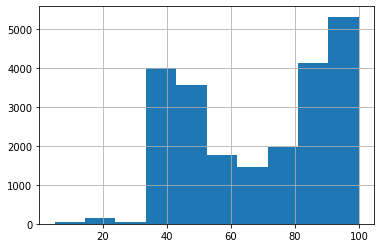

In [81]:
sessions['sqr'][sessions['sqr'] < 100].hist()

In [95]:
sessions_gt_7 = sessions[(sessions['fechaFin'] - sessions['fechaEntrada']) > pd.Timedelta(hours=7)]
sessions_gt_7.shape

(608, 25)

<AxesSubplot:>

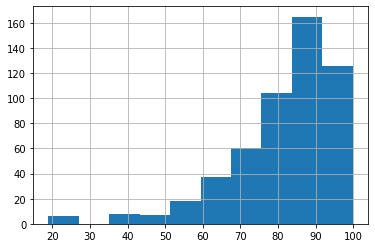

In [96]:
sessions_gt_7['sqr'][sessions_gt_7['sqr'] < 100].hist()

# PRO

In [133]:
sessions = pd.read_parquet('../data/raw/flex_sesiones.parquet')
movements = pd.read_parquet('../data/raw/flex_movimientos.parquet')

In [134]:
movements = rename_movement_columns(movements)
sessions_gt_7 = sessions[(sessions['fechaFin'] - sessions['fechaInicio']) > pd.Timedelta(hours=7)]
sessions_gt_7.shape

(35773, 24)

In [135]:
def calculate_new_sqr(session):
    session_movements = movements[movements['idSesion'] == session['idSesiones']]
    return calculate_sqi(session['fechaEntrada'], session['fechaInicio'], session_movements)

sessions_gt_7['sqr'] = sessions_gt_7.apply(calculate_new_sqr, axis=1)

/home/cegf/.virtualenvs/DESCANSARE_ANAL/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [136]:
sessions_gt_7.to_parquet('../data/processed/sessions_new_sqr_flex.parquet')

<AxesSubplot:>

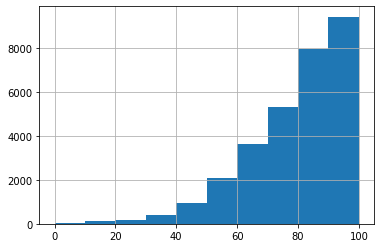

In [137]:
sessions_gt_7['sqr'][sessions_gt_7['sqr'] < 100].hist()

<AxesSubplot:>

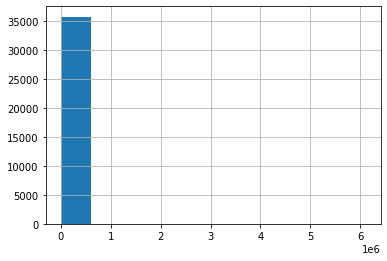

In [138]:
sessions_gt_7['sqr'].hist()

In [139]:
print(sessions_gt_7['sqr'][sessions_gt_7['sqr'] < 100].shape)
print(sessions_gt_7['sqr'].shape)

(30152,)
(35773,)


In [140]:
sessions_gt_7[sessions_gt_7['sqr'] > 100]

,idSesiones,fechaInicio,fechaFin,idPerfil,idImatt,sqr,lecho,notaUsuario,suenios,idUsuario,...,dia_estres,poco_descanso,notas,imagen_hot,wake,rem,nr_1,nr_2,deep,fechaEntrada
13,33,2017-07-02 00:32:31,2017-07-02 09:30:02,NaN,37.0,102.668889,1.0,5.0,None,2.0,...,0.0,1.0,0,None,None,None,None,None,None,NaT
37,58,2017-07-11 22:45:05,2017-07-12 07:40:40,NaN,22.0,102.411111,2.0,NaN,None,2.0,...,NaN,NaN,0,None,None,None,None,None,None,NaT
44,65,2017-07-13 09:24:14,2017-07-14 07:55:02,NaN,11.0,211.106667,1.0,NaN,None,3.0,...,NaN,NaN,0,None,None,None,None,None,None,NaT
64,85,2017-07-20 20:11:40,2017-07-21 07:58:46,NaN,11.0,125.280000,1.0,NaN,None,10.0,...,NaN,NaN,0,None,None,None,None,None,None,NaT
68,89,2017-07-20 20:11:40,2017-07-21 07:58:46,NaN,11.0,125.280000,1.0,NaN,None,3.0,...,NaN,NaN,0,None,None,None,None,None,None,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84954,95853,2020-08-26 19:16:53,2020-08-27 07:59:51,5486.0,820.0,131.523941,1.0,NaN,None,821.0,...,NaN,NaN,None,None,None,None,None,None,None,2020-08-26 19:09:05
84956,95855,2020-08-29 00:42:34,2020-08-29 09:39:09,5486.0,820.0,101.905537,1.0,NaN,None,821.0,...,NaN,NaN,None,None,None,None,None,None,None,2020-08-29 00:37:33
84963,95862,2020-08-30 00:57:37,2020-08-30 10:13:16,5486.0,820.0,102.764834,2.0,NaN,None,821.0,...,NaN,NaN,None,None,None,None,None,None,None,2020-08-30 00:00:53
84970,95869,2020-08-30 21:24:14,2020-08-31 08:14:47,7398.0,970.0,105.745788,1.0,NaN,None,1294.0,...,NaN,NaN,None,None,None,None,None,None,None,2020-08-30 21:07:53


In [141]:
movements[movements['idSesion'] == 26732]

,idMovimientos,timestamp,idSesion,pressure1,pressure2,pressure3,pressure4,pressure5,pressure6,pressure7,pressure8,pressure9,pressure10,pressure11,pressure12,type
1284732,1462231,2019-05-05 01:09:29,26732,12,0,41,46,42,13,14,19,0,0,40,25,LIGHT
1284733,1462232,2019-05-05 01:09:31,26732,12,0,41,46,42,13,14,18,0,0,41,32,LIGHT
1284734,1462233,2019-05-05 01:42:42,26732,11,0,44,51,44,14,14,20,0,0,41,26,MEDIUM_2
1284735,1462234,2019-05-05 01:42:44,26732,10,0,44,51,44,14,14,20,0,0,40,26,MEDIUM_2
1284736,1462235,2019-05-05 01:43:07,26732,10,0,44,51,44,14,14,20,0,0,41,26,LIGHT
1284737,1462236,2019-05-05 01:43:09,26732,11,0,44,51,44,15,14,20,0,0,41,26,LIGHT
1284738,1462237,2019-05-05 02:11:56,26732,11,0,44,52,46,16,16,30,0,0,38,18,LIGHT
1284739,1462238,2019-05-05 02:11:58,26732,11,0,44,51,45,16,16,29,0,0,38,18,LIGHT
1284740,1462239,2019-05-05 02:48:46,26732,11,0,44,50,47,16,12,25,0,0,40,20,LIGHT
1284741,1462240,2019-05-05 02:48:48,26732,11,0,44,50,47,17,12,25,0,0,40,20,LIGHT
